# Определение перспективного тарифа для телеком-компании

В данном проекте мы определим перспективный тариыфный план для компании "Мегалайн".   
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.   
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделаем вывод — какой тариф лучше.

**Описание тарифов**  

****Тариф «Смарт»***   
 1. Ежемесячная плата: 550 рублей
 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета:
     - минута разговора: 3 рубля
     - сообщение: 3 рубля
     - 1 Гб интернет-трафика: 200 рублей   
     
***Тариф «Ультра»***
 1. Ежемесячная плата: 1950 рублей
 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета:
     - минута разговора: 1 рубль
     - сообщение: 1 рубль
     - 1 Гб интернет-трафика: 150 рублей
     
`Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.`

**Ход исследования**

Входные данные — данные 500 пользователей "Мегалайн". `users` - информация о пользователях, `calls` - информация о звонках, `messages` - информация о сообщениях, `internet` - информация об интернет-сессиях, `tariffs` - информация о тарифах. О качестве данных ничего не известно. Поэтому перед исследованием понадобится обзор данных.

*Описание данных:*

*Таблица users (информация о пользователях):*

`user_id` — уникальный идентификатор пользователя   
`first_name` — имя пользователя   
`last_name` — фамилия пользователя   
`age` — возраст пользователя (годы)   
`reg_date` — дата подключения тарифа (день, месяц, год)   
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)   
`city` — город проживания пользователя   
`tariff` — название тарифного плана   

*Таблица calls (информация о звонках):*

`id` — уникальный номер звонка   
`call_date` — дата звонка   
`duration` — длительность звонка в минутах   
`user_id` — идентификатор пользователя, сделавшего звонок   

*Таблица messages (информация о сообщениях):*

`id` — уникальный номер сообщения   
`message_date` — дата сообщения   
`user_id` — идентификатор пользователя, отправившего сообщение   

*Таблица internet (информация об интернет-сессиях):*

`id` — уникальный номер сессии   
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)   
`session_date` — дата интернет-сессии   
`user_id `— идентификатор пользователя   

*Таблица tariffs (информация о тарифах):*

`tariff_name` — название тарифа   
`rub_monthly_fee` — ежемесячная абонентская плата в рублях   
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату   
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату   
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)   
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)   
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета   
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)   

Исследование пройдёт в четыре основных этапа:

1. Обзор данных.
2. Предобработка данных.
3. Анализ данных.
4. Проверка гипотез.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-данных-к-нужному-типу" data-toc-modified-id="Приведение-данных-к-нужному-типу-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведение данных к нужному типу</a></span></li><li><span><a href="#Поиск-и-удаление-ошибок-в-данных" data-toc-modified-id="Поиск-и-удаление-ошибок-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск и удаление ошибок в данных</a></span></li><li><span><a href="#Расчёты-по-каждому-пользователю" data-toc-modified-id="Расчёты-по-каждому-пользователю-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Расчёты по каждому пользователю</a></span><ul class="toc-item"><li><span><a href="#Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам" data-toc-modified-id="Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Количество сделанных звонков и израсходованных минут разговора по месяцам</a></span></li><li><span><a href="#Количество-отправленных-сообщений-по-месяцам" data-toc-modified-id="Количество-отправленных-сообщений-по-месяцам-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Количество отправленных сообщений по месяцам</a></span></li><li><span><a href="#Объем-израсходованного-интернет-трафика-по-месяцам" data-toc-modified-id="Объем-израсходованного-интернет-трафика-по-месяцам-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Объем израсходованного интернет-трафика по месяцам</a></span></li><li><span><a href="#Помесячная-выручка-с-каждого-пользователя" data-toc-modified-id="Помесячная-выручка-с-каждого-пользователя-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Помесячная выручка с каждого пользователя</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных   
Загрузим необходимые нам библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format
print('Setup complete')

Setup complete


Загрузим данные и посмотрим на информацию о них.

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except:
    calls = pd.read_csv('datasets/calls.csv')
    internet = pd.read_csv('datasets/internet.csv')
    messages = pd.read_csv('datasets/messages.csv')
    tariffs = pd.read_csv('datasets/tariffs.csv')
    users = pd.read_csv('datasets/users.csv')

#for data in [calls, internet, messages, users, tariffs]: print(data.info(), end='\n\n')
for data in [calls, internet, messages, users, tariffs]: display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Здесь можно сделать первые выводы о данных.   

Таблица calls (информация о звонках):   
`call_date` - будем переводить в формат `datetime`   

Таблица internet (информация об интернет-сессиях):      
`session_date` - будем переводить в формат `datetime`  
`Unnamed: 0` - неизвестный столбец с данными, о которых нет описания. После просмотра будем принимать решение об удалении.   

Таблица messages (информация о сообщениях):   
`message_date` - будем переводить в формат `datetime`   

Таблица users (информация о пользователях):   
`churn_date` - будем переводить в формат `datetime`   
`reg_date` - будем переводить в формат `datetime` 

Проверим наличие дубликатов в каждой таблице.

In [3]:
for data in [calls, internet, messages, users, tariffs]: print(data.duplicated().sum())

0
0
0
0
0


## Предобработка данных

### Приведение данных к нужному типу   
Заменим тип данных в датах и удалим столбец "Unnamed: 0" из таблицы internet

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
try:
    internet.drop('Unnamed: 0', axis=1, inplace=True)
except:
    print('Run all cells, column "Unnamed: 0" has been deleted before')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Поиск и удаление ошибок в данных   
Округлим значения потраченных минут в большую сторону через функцию.

In [5]:
#calls['duration'] = calls['duration'].apply(np.ceil)
#internet['mb_used'] = internet['mb_used'].apply(np.ceil)

def round_values(a):
    return np.ceil(a)

calls['duration'] = round_values(calls['duration'])

Нулевые значения в полях: длительность звонка или объем интернет сессии не повлияют на наше исследование, так как единственный параметр, который будет изменяться это количество услуг, предоставляемых компанией( например, от таких нулевых значений изменится общее количество звонков) на другие параметры они не повлияют, так как общую статистику мы получаем путем сложения параметров для конкретного абонента в определенный месяц. Количество звонков мы нигде не исследуем, так как нам интереснее не частота, а длительность.   
Так как данные значения влияют только на количество звонков, которые мы не исследуем, то дополнительно исключать их из выборки или изменять их значение не имеет смысла.

### Расчёты по каждому пользователю   
Для начала расчётов добавим столбцы с месяцем в данные со звонками, сообщениями и интернет-сессиями.

In [6]:
internet['month'] = internet['session_date'].dt.month
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month

Найдем для каждого пользователя:   
- количество сделанных звонков и израсходованных минут разговора по месяцам;   
- количество отправленных сообщений по месяцам;   
- объем израсходованного интернет-трафика по месяцам;   
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).   

Для подсчёта значений создадим столбец с уникальным именем пользователя, из значений фамилии, имени и города

In [7]:
users['uniq_name'] = users['last_name'] + users['first_name'] + users['city']

#### Количество сделанных звонков и израсходованных минут разговора по месяцам   
Для подсчёта соединим данные со звонками с данными пользователей и создадим сводную по пользователям и месяцам

In [8]:
calls_pivot = (
    calls
    .merge(users, on='user_id', how='inner')
    .pivot_table(
        values=['uniq_name', 'duration'], 
        index=['user_id', 'month'], 
        aggfunc={'uniq_name': 'count', 'duration': 'sum'}
    )
)
calls_pivot.columns = ['duration', 'calls']
calls_pivot

duration  calls
user_id month                 
1000    5        159.00     22
        6        172.00     43
        7        340.00     47
        8        408.00     52
        9        466.00     58
...                 ...    ...
1498    10       247.00     41
1499    9         70.00      9
        10       449.00     68
        11       612.00     74
        12       492.00     69

[3174 rows x 2 columns]

#### Количество отправленных сообщений по месяцам   
Здесь сделаем те же самые действия для сообщений.

In [9]:
messages_pivot = (
    messages
    .merge(users, on='user_id', how='inner')
    .pivot_table(
        values='uniq_name', 
        index=['user_id', 'month'], 
        aggfunc={'uniq_name': 'count'}
    )
)
messages_pivot.columns = ['messages']
messages_pivot

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

#### Объем израсходованного интернет-трафика по месяцам

In [10]:
internet_pivot = (
    internet
    .merge(users, on='user_id', how='right')
    .pivot_table(
        values='mb_used', 
        index=['user_id', 'month'], 
        aggfunc={'mb_used': 'sum'}
    )
)
internet_pivot.columns = ['mb_used']
internet_pivot

mb_used
user_id month          
1000    5.00   2,253.49
        6.00  23,233.77
        7.00  14,003.64
        8.00  14,055.93
        9.00  14,568.91
...                 ...
1498    10.00 20,579.36
1499    9.00   1,845.75
        10.00 17,788.51
        11.00 17,963.31
        12.00 13,055.58

[3203 rows x 1 columns]

#### Помесячная выручка с каждого пользователя   
Для подсчёта нам понадобиться объединить наши сводные таблицы в одну.

In [11]:
grouped_data = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
grouped_data = grouped_data.merge(internet_pivot, on=['user_id', 'month'], how='outer')

#grouped_data = grouped_data.reset_index().merge(users, on=['user_id'], how='outer')
grouped_data

duration  calls  messages   mb_used
user_id month                                     
1000    5        159.00  22.00     22.00  2,253.49
        6        172.00  43.00     60.00 23,233.77
        7        340.00  47.00     75.00 14,003.64
        8        408.00  52.00     81.00 14,055.93
        9        466.00  58.00     57.00 14,568.91
...                 ...    ...       ...       ...
1489    9           nan    nan     32.00 17,206.30
        10          nan    nan     21.00 19,559.44
        11          nan    nan     20.00 17,491.56
        12          nan    nan     35.00 17,322.51
1476    4           nan    nan       nan    530.78

[3214 rows x 4 columns]

Посчитаем, все ли пользователи на месте.

In [12]:
print('Было пользователей:', len(users['user_id'].unique()))
print('Стало пользователей:', len(grouped_data.reset_index()['user_id'].unique()))

for user in users['user_id'].unique():
    if user not in grouped_data.reset_index()['user_id'].unique():
        print('Забыли пользователя:', user)

Было пользователей: 500
Стало пользователей: 498
Забыли пользователя: 1128
Забыли пользователя: 1371


В действительности мы пропустили двух пользователей. Это произошло из-за отсутсвия информации по этим пользователям в 3-х наших таблицах со звонками, трафиком и сообщениями, но за тариф они по всей видимости платили. Добавим наших двух потеряшек из таблицы с пользователями вместе с тем добавив недостающие данные по наименованию тарифа и города пользователя.

In [13]:
grouped_data = grouped_data.reset_index().merge(users, on=['user_id'], how='outer')
print('Было пользователей:', len(users['user_id'].unique()))
print('Стало пользователей:', len(grouped_data.reset_index()['user_id'].unique()))

Было пользователей: 500
Стало пользователей: 500


Удалим не нужные нам столбцы.

In [14]:
grouped_data.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date', 'uniq_name'], axis=1, inplace=True)
grouped_data

,user_id,month,duration,calls,messages,mb_used,city,tariff
0,1000,5.00,159.00,22.00,22.00,"2,253.49",Краснодар,ultra
1,1000,6.00,172.00,43.00,60.00,"23,233.77",Краснодар,ultra
2,1000,7.00,340.00,47.00,75.00,"14,003.64",Краснодар,ultra
3,1000,8.00,408.00,52.00,81.00,"14,055.93",Краснодар,ultra
4,1000,9.00,466.00,58.00,57.00,"14,568.91",Краснодар,ultra
...,...,...,...,...,...,...,...,...
3211,1489,10.00,nan,nan,21.00,"19,559.44",Санкт-Петербург,smart
3212,1489,11.00,nan,nan,20.00,"17,491.56",Санкт-Петербург,smart
3213,1489,12.00,nan,nan,35.00,"17,322.51",Санкт-Петербург,smart
3214,1128,nan,nan,nan,nan,nan,Волжский,ultra


Пропущенные значения заменим нулями. Но прежде посчитаем это кол-во пропусков.

In [15]:
print('Кол-во пропусков в продолжительности звонков:', grouped_data['duration'].isna().sum())
print('Кол-во пропусков в кол-ве сообщений:', grouped_data['messages'].isna().sum())
print('Кол-во пропусков в объёме интернет-трафика:', grouped_data['mb_used'].isna().sum())
print('Кол-во пропусков в кол-ве звонков', grouped_data['calls'].isna().sum())

Кол-во пропусков в продолжительности звонков: 42
Кол-во пропусков в кол-ве сообщений: 499
Кол-во пропусков в объёме интернет-трафика: 13
Кол-во пропусков в кол-ве звонков 42


In [16]:
grouped_data.loc[grouped_data['duration'].isna(), 'duration'] = 0
grouped_data.loc[grouped_data['messages'].isna(), 'messages'] = 0
grouped_data.loc[grouped_data['mb_used'].isna(), 'mb_used'] = 0
grouped_data.loc[grouped_data['calls'].isna(), 'calls'] = 0

Напишем функцию для подсчёта выручки и применим её для нового столбца в сгруппированных данных.
Подсчёт потраченных гигабайт будет выполнен согласно тарифного плана.

In [17]:
def get_income(row):
    '''The function returns monthly expenses of user'''
    messages = row['messages']
    duration = row['duration']
    mb_used = row['mb_used']
    tariff = row['tariff']
    
    if tariff == 'smart':
        extra_duration = duration - tariffs.loc[0, 'minutes_included']
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        extra_mb = mb_used - tariffs.loc[0, 'mb_per_month_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_messages < 0: extra_messages = 0
        if extra_mb < 0: extra_mb = 0
            
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages +
               tariffs.loc[0, 'rub_per_gb'] * mt.ceil(extra_mb / 1024) +
                tariffs.loc[0, 'rub_per_minute'] * extra_duration +
                tariffs.loc[0, 'rub_monthly_fee']
               )
    else:
        extra_duration = duration - tariffs.loc[1, 'minutes_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        extra_mb = mb_used - tariffs.loc[1, 'mb_per_month_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_messages < 0: extra_messages = 0
        if extra_mb < 0: extra_mb = 0
            
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages +
               tariffs.loc[1, 'rub_per_gb'] * mt.ceil(extra_mb / 1024) +
                tariffs.loc[1, 'rub_per_minute'] * extra_duration +
                tariffs.loc[1, 'rub_monthly_fee']
               )
grouped_data['income'] = grouped_data.apply(get_income, axis=1).astype('int')
grouped_data

,user_id,month,duration,calls,messages,mb_used,city,tariff,income
0,1000,5.00,159.00,22.00,22.00,"2,253.49",Краснодар,ultra,1950
1,1000,6.00,172.00,43.00,60.00,"23,233.77",Краснодар,ultra,1950
2,1000,7.00,340.00,47.00,75.00,"14,003.64",Краснодар,ultra,1950
3,1000,8.00,408.00,52.00,81.00,"14,055.93",Краснодар,ultra,1950
4,1000,9.00,466.00,58.00,57.00,"14,568.91",Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,0.00,0.00,21.00,"19,559.44",Санкт-Петербург,smart,1550
3212,1489,11.00,0.00,0.00,20.00,"17,491.56",Санкт-Петербург,smart,1150
3213,1489,12.00,0.00,0.00,35.00,"17,322.51",Санкт-Петербург,smart,950
3214,1128,nan,0.00,0.00,0.00,0.00,Волжский,ultra,1950


In [18]:
# check

grouped_data['income'].sum()

4916951

## Анализ данных   
Здесь мы опишем поведение клиентов оператора, исходя из выборки.   
Посмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.   
Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы.

In [19]:
grouped_data.pivot_table(index='tariff', values=['duration', 'messages', 'mb_used', 'income'],
                                      aggfunc=['median', 'mean', 'var', 'std'])

median                               mean                     \
       duration income   mb_used messages duration   income   mb_used   
tariff                                                                  
smart    421.50   1021 16,505.47    28.00   417.75 1,289.64 16,201.12   
ultra    518.00   1950 19,304.02    38.00   526.09 2,070.03 19,449.06   

                       var                                         std         \
       messages   duration     income        mb_used messages duration income   
tariff                                                                          
smart     33.37  36,281.39 669,730.76  34,564,843.48   796.96   190.48 818.37   
ultra     49.31 101,052.49 141,387.71 102,032,129.46 2,285.42   317.89 376.02   

                           
         mb_used messages  
tariff                     
smart   5,879.19    28.23  
ultra  10,101.10    47.81

Исходя из этих данных можно сделать следующие выводы об использовании пользователями двух тарифов за месяц:   

*SMART:*   
Средняя продолжительность разговора: 421,5 минуты   
Средний объём израсходованного интернет-трафика: 16529 Мб   
Среднее кол-во отправленных сообщений: 28   
Средняя палата в месяц: 1038 р.

*ULTRA:*   
Средняя продолжительность разговора: 518 минут   
Средний объём израсходованного интернет-трафика: 19320 Мб   
Среднее кол-во отправленных сообщений: 38   
Средняя палата в месяц: 1950 р.

[Text(0.5, 1.0, 'Boxplot Mb used')]

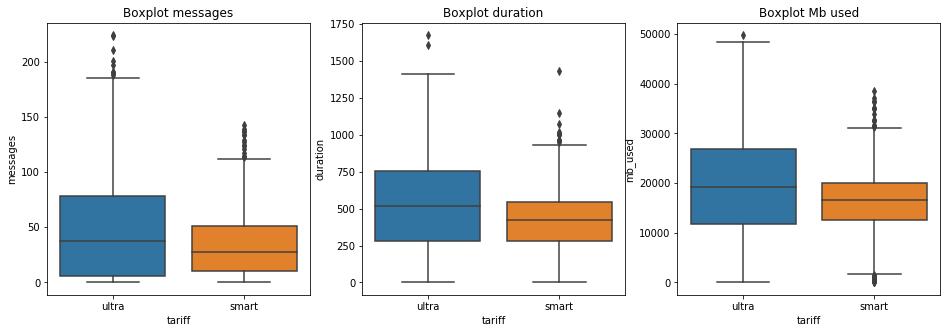

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))

sns.boxplot(x="tariff", y='messages', data=grouped_data, orient='v', ax=axes[0]).set_title('Boxplot messages')
sns.boxplot(x="tariff", y='duration', data=grouped_data, orient='v', ax=axes[1]).set(title='Boxplot duration')
sns.boxplot(x="tariff", y='mb_used', data=grouped_data, orient='v', ax=axes[2]).set(title='Boxplot Mb used')

Минуты разговора, число сообщений и объем потраченного интернет-трафика по тарифу «Ультра» имеет большую дисперсию по сравнению с тарифом «Смарт», и медианы по вышеперечисленным признакам также смещены в большую сторону. Кроме того, выбросов в рамках более дешевого тарифа существенно больше.

Построим гистограммы.

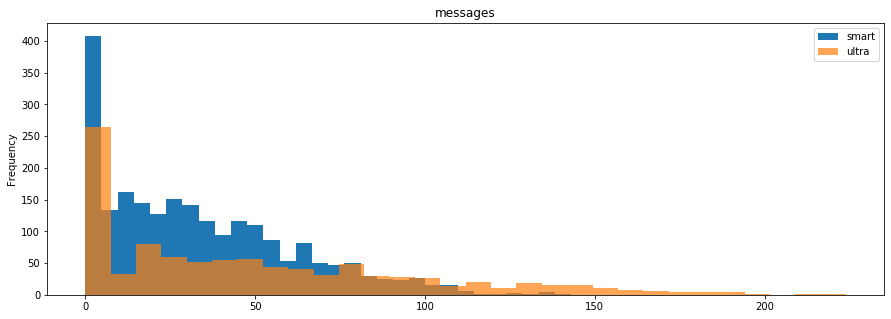

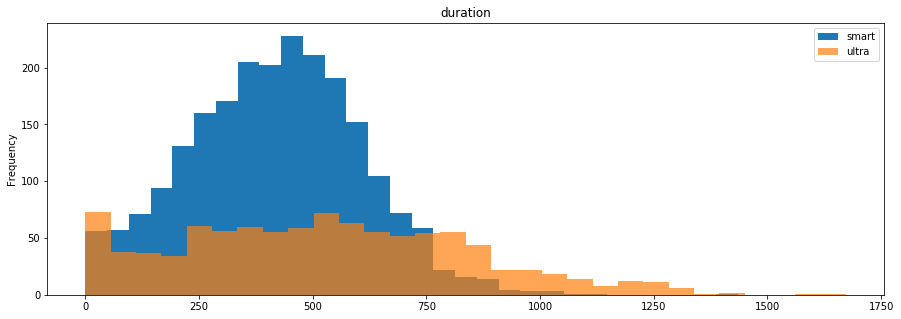

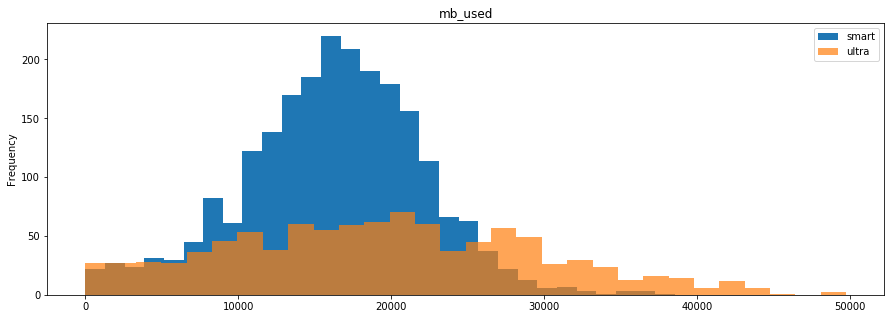

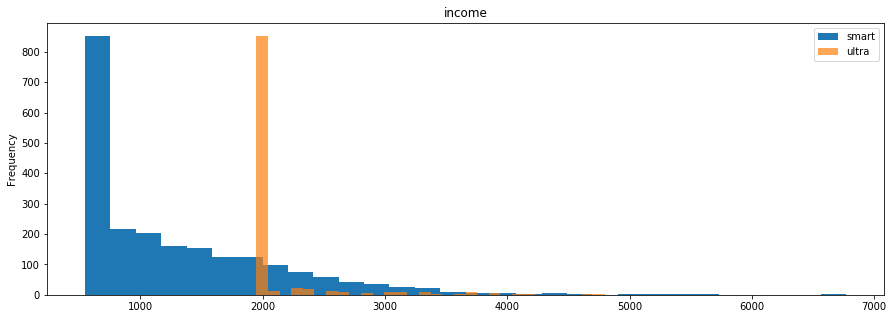

In [21]:
try:
    grouped_data = grouped_data.reset_index()
except:
    print()

column_list = ['messages', 'duration', 'mb_used', 'income']

for column in column_list:
    grouped_data.query('tariff == "smart"')[column].plot(kind='hist',
                                                         label='smart',
                                                        bins=30,
                                                        figsize=(15,5))
    
    grouped_data.query('tariff == "ultra"')[column].plot(kind='hist',
                                                         label='ultra',
                                                        bins=30,
                                                        figsize=(15,5),
                                                        alpha=0.7)
    
    plt.title(column)
    plt.legend()
    plt.show()

По графикам можно сказать что пользователям тарифа smart чаще всего не хватает услуг в рамках пакета и они переплачивают сверх тарифа. Кроме этого можно заметить, что пользователи тарифа ultra не тратят весь базовый пакет минут и количества смс.

## Проверка гипотез   
Нам предстроит проверить следующие гипотезы:   
 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;   
 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Запишем нулевую и альтернативную гипотезы.   
$H_0 $ — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».   
$H_1 $ — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.  
$\alpha = 5\%$

Используем метод `scipy.stats.ttest_ind (array1, array2, equal_var = False)`. `False`, потому что дисперсии наших выборок отличаются.

In [22]:
ultra = grouped_data.query('tariff == "ultra"')['income']
smart = grouped_data.query('tariff == "smart"')['income']

alpha = .05

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


Всё как и ожидалось. Об этом мы писали в начале анализа данных:   
*SMART:*   
Средняя палата в месяц: 1038 р.   
*ULTRA:*   
Средняя палата в месяц: 1950 р.   

Перефразировав альтернативную гипотезу, котрую мы принимаем,  можно сказать **, что доходы "Мегалайна" с пользователя по тарифу "Ультра" действительно отличаются по сравнению с доходами от тарифа "Смарт".**

Посмотрим в чью сторону у нас имеется перевес по каждому месяцу использования тарифа.

Доход тарифа Ультра за анализируеммый период: 2041050
Доход тарифа Смарт за анализируеммый период: 2875901
Кол-во пользователей тарифа Ульртра в выборке: 149
Кол-во пользователей тарифа Смарт в выборке: 351


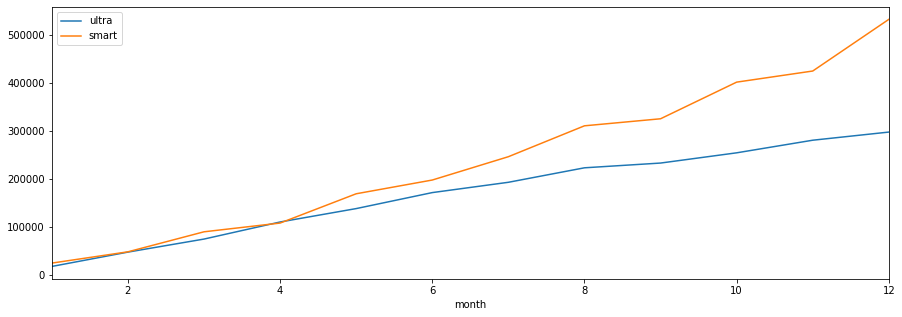

In [23]:
grouped_data.query('tariff == "ultra"').groupby('month')['income'].sum().plot(label='ultra', figsize=(15,5))
grouped_data.query('tariff == "smart"').groupby('month')['income'].sum().plot(label='smart')
plt.legend();
print('Доход тарифа Ультра за анализируеммый период:', ultra.sum())
print('Доход тарифа Смарт за анализируеммый период:', smart.sum())
print('Кол-во пользователей тарифа Ульртра в выборке:', users.query('tariff == "ultra"')['user_id'].count())
print('Кол-во пользователей тарифа Смарт в выборке:', users.query('tariff == "smart"')['user_id'].count())

**На графике выше видно, что "дешёвый" тариф smart приносит больше дохода, который растёт быстрее тарифа ultra. Это прежде всего связано с перевесом кол-ва пользователей тарифа smart в данной выборке - 351 пользователь, против 149 по тарифу ultra. Превес может быть как случайным так и говорить о популярности тарифа smart.**

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов   
Запишем нулевую и альтернативную гипотезы.   
$H_0 $ — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.   
$H_1 $ — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.   
$\alpha = 5\%$

In [24]:
moscow = grouped_data.query('city == "Москва"')['income']
regions = grouped_data.query('city != "Москва"')['income']

alpha = .05

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000279
Не получилось отвергнуть нулевую гипотезу


Р-значение говорит нам о вероятности получить наблюдаемый результат (*средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов*) при условии, что нулевая гипотеза верна. 
Данный статистический тест не дал возможности опровергунть исходную гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны. Действительно, **доходы в Московском регионе практически не отличаются от других населенных пунктов.**

## Общий вывод

По результатам статистического анализа доходы **от тарифа «Смарт» больше, чем от тарифа «Ультра»**: в среднем «Мегалайн» от одного пользователя в месяц получает **1037 рублей и 1950 рублей** соответственно. Из-за перевеса кол-ва пользователей в выборке в сторону тарифа «Смарт» (351 пользователь против 149 у тарифа «Ультра») общий доход за анализируем период будет составлять:

 - Доход тарифа **«Ультра»** за анализируеммый период: **2 041 950 р.**
 - Доход тарифа **«Смарт»** за анализируеммый период: **2 886 301 р.**

***Особенности использования тарифов заключаются в следующем:***
- *Пользователям тарифа «Смарт»* не хватает услуг в рамках тарифного пакета: кроме абонентской платы пользователи *в среднем доплачивают еще 487 рублей ежемесячно (+88,7%)*. 
- *Пользователи тарифа «Ультра»*, напротив, не используют тарифный пакет в полном объеме.
- Средние доходы от пользователей в Москве *не отличаются* от доходов в других населенных пунктах: разница статистически незначима (p-значение: 0,508).

***Показатели использования тарифа Смарт в среднем за месяц:***   
- Минту разговора 421,5, осталось 78,5 минут - услуга не используется в полном объёме.   
- Использование интернет трафика 16,14 Гб, больше пакета на 2 Гб - переплата за тариф около 400р.   
- СМС сообщения использовано 28, осталось 22 - услуга не используется в полном объёме, остаётся почти половина.   

***Показатели использования тарифа Ультра в среднем за месяц:***   
- Минту разговора 518, осталось 2 482 минут - услуга не используется в полном объёме, около 80% остаются не использованными.   
- Использование интернет трафика 18,86 Гб, остаётся 11 Гб - услуга не используется в полном объёме, около 40% остаются не использованными.   
- СМС сообщения использовано 38, осталось 962 - услуга почти не используется, около 96% остаются не использованными. 